# 5/13/24 Field Test 

On 5/13/24 a field test was completed to evaluate the effectivness of the multiparameter low-cost sensor versus a commerical sensor as well as the effectiveness of an additional chlorophyll low-cost sesnor versus the commercial sensor. While the water sampels were collected from the ICW, this test was completed indoors.

## Methods 

After both the chlorophyll and turbidity components of the sensor underwent standard dilution tests and had an appropriate R2 value, and the housing was constructed for the sensor, field tests were performed on the sensor. Field testing was performed in the Intracoastal Waterway (ICW) this is a waterbody that spans from the North Atlantic to the Gulf of Mexico and is primarily composed of saltwater. The fieldwork performed was in the southern North Carolina portion of the ICW at the UNCW Center for Marine Science. This location was chosen as the Coastal Ocean Research and Monitoring Program (CORMP). On May 13th 2023, field testing was performed with the multiparameter sensor indoors, however this time a YSI EXO2 was calibrated indoors to compare to the multiparameter sensor as well as a low-cost chlorophyll a sensor that underwent the same chlorophyll dilution tests as the multiparameter sensor. The YSI EXO2 underwent a calibration for chlorophyll a and turbidity. This calibration was performed in reference to the YSI EXO2 manual (Xylem, 2019). A rhodamine solution was prepared as described in the chlorophyll dilution methods above. The YSI EXO2 was calibrated to 0.0μg/L and then to the rhodamine stock solution, which was 62.3μg/L due to the temperature of the water. Then the turbidity portion of the YSI EXO2 was calibrated, this was a 3-point calibration with the first point being 0 FNU (DI water), the second being 100 FNU and the third FNU. The turbidity solutions were created by combining the Formazin solution with DI water as described in the turbidity dilutions methods. 
A water sample was obtained from the ICW at UNCW’s Center for Marine Science with a Nalgene bottle from the surface of the and walked back to the lab. water. A cuvette was filled with the water sample until it overflowed and dumped out 3 times. Then the fourth time the cuvette was filled to the top and placed into the sensor. The sensor was then covered with the cap as well as a cardboard box to ensure no ambient light was getting into the sensor. The remaining water was split between a beaker to test the chlorophyll low-cost sensor and the EXO2 YSI. The low-cost chlorophyll sensor was put underneath a carboard box and then underwent chlorophyll measurements for one minute. The EXO2 YSI underwent both chlorophyll and turbidity measurements for a minute. Then the water sample was dumped down the drain and another water sample were transported from the ICW to the lab for testing. This was done a total of ten times. 


The average chlorophyll measurments in F8 values from the multiparameter low-cost sensor was run through the equation y = 0.7231x + 9.0639 this is the line of best fit equation derived from the chlorophyll dilution tests in the water resistant hoising. 

The average turbidity measurments in NIR values from the multiparameter low-cost sensor was run through the equation y = 76.3208x + 1578.2578 this is the line of best fit equation derived from the turbiodity dilution tests in the water resistant hoising. 

The average chlorophyll measurments from the additional low-cost sensor was run through the equation y = 2.434x + 9.9718 this is the line of best fit equation derived from the past chlorophyll dilutio tests performed on the device. 

# Chlorophyll Results (Multiparameter low-cost sensor)

The chlorophyll measurements from the multiparameter low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the multiparameter low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

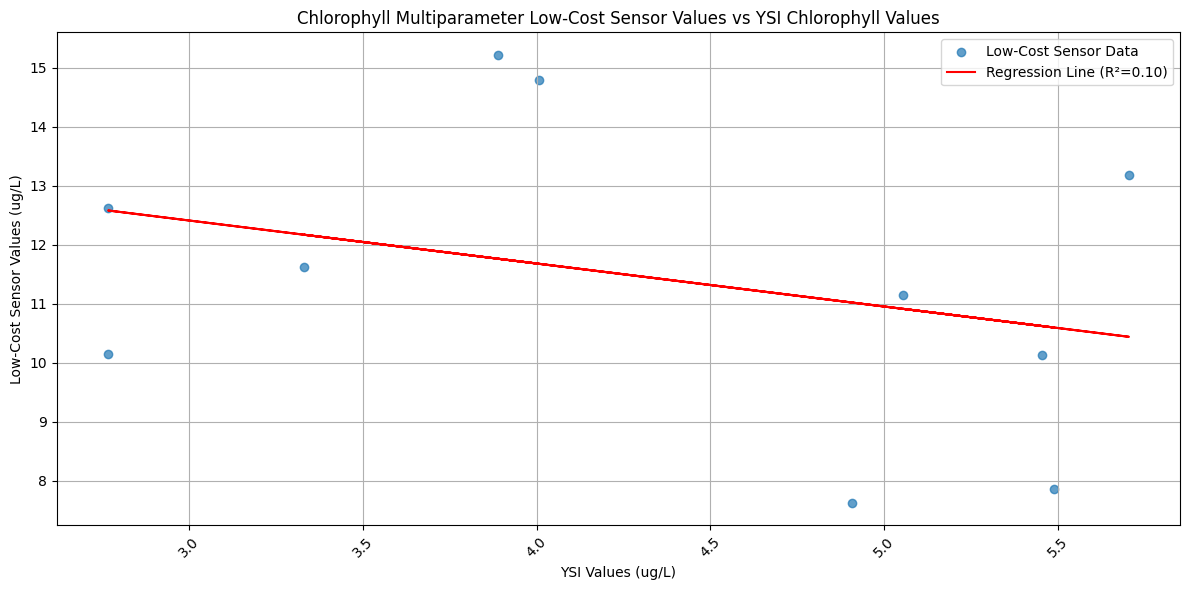

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# YSI Chlorophyll Values
YSI_chl_values = {
    'Trial': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'ug/L': [3.88796, 4.00704504950495, 3.33117892156862, 4.9066835643, 5.7038719, 5.05516920353982, 5.48843852941176, 2.76759633663366, 2.76759633663366, 5.45261599999999]
}

# Create a DataFrame for the YSI chl values
df_chl = pd.DataFrame(YSI_chl_values)
df_chl['Trial'] = df_chl['Trial'].astype(float)  # Convert 'Trial' column to float

# Read the CSV file
df_csv = pd.read_csv('/Users/jessiewynne/inside_test_chl_5_13_24.csv')

# Clean the 'F8 (Raw)' column in the CSV file
df_csv['F8 (Raw)'] = pd.to_numeric(df_csv['F8 (Raw)'], errors='coerce')

# Remove rows with NaN values in the 'F8 (Raw)' column in the CSV file
df_csv = df_csv.dropna(subset=['F8 (Raw)'])

# Convert ' Trial' column to numeric, ignoring errors to handle 'DI'
df_csv[' Trial'] = pd.to_numeric(df_csv[' Trial'].str.strip(), errors='coerce')

# Remove rows with NaN values in the ' Trial' column
df_csv = df_csv.dropna(subset=[' Trial'])

# Group by ' Trial' and calculate the average of 'F8 (Raw)' for each trial
averages_csv = df_csv.groupby(' Trial')['F8 (Raw)'].mean()

# Solve for x using the equation y = 76.3208x + 1578.2578 for the CSV file
x_values_csv = ((averages_csv - 9.0639) / 0.7231)

# Calculate the average difference
average_difference = np.mean(np.abs(x_values_csv - df_chl['ug/L']))

# Ensure the ' Trial' index in averages_csv is float
averages_csv.index = averages_csv.index.astype(float)

# Merge the CSV and YSI chl values
merged_df = pd.merge(df_chl, pd.DataFrame(averages_csv), left_on='Trial', right_index=True, how='inner', suffixes=('_x', '_y'))

# Reset the index of x_values_csv
x_values_csv = x_values_csv.reset_index(drop=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df_chl['ug/L'], x_values_csv, label='Low-Cost Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_chl['ug/L'], x_values_csv)

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(df_chl['ug/L'], slope * df_chl['ug/L'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('YSI Values (ug/L)')
plt.ylabel('Low-Cost Sensor Values (ug/L)')
plt.title('Chlorophyll Multiparameter Low-Cost Sensor Values vs YSI Chlorophyll Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Turbidity Results

The turbidity measurements from the multiparamter low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the multiparameter low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

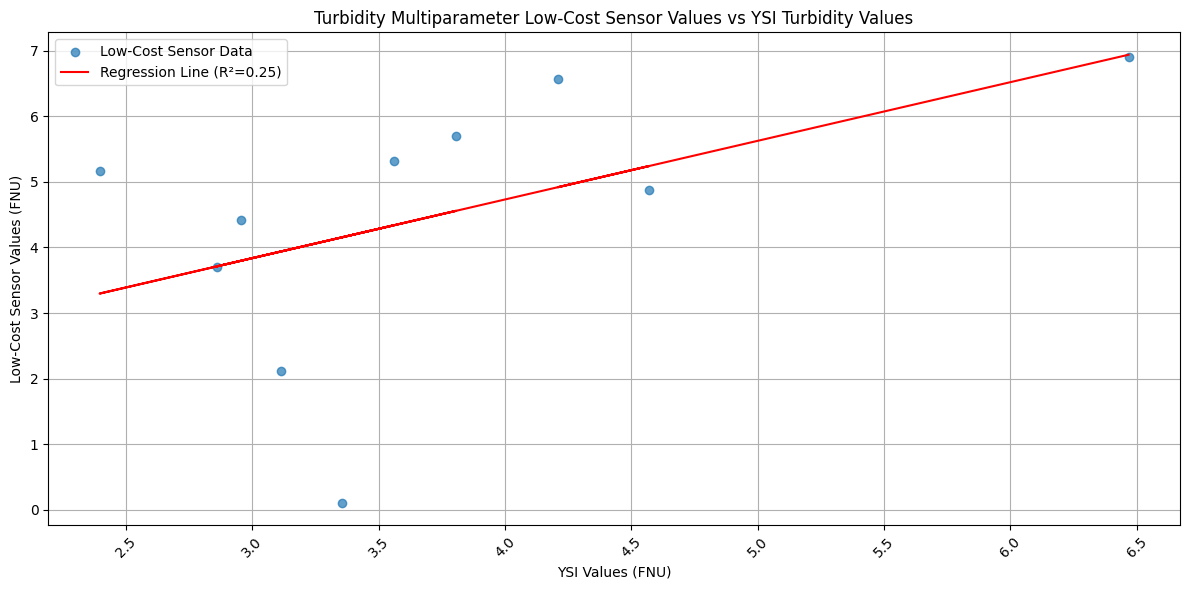

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

YSI_turb_values = {
    'Trial': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'FNU': [6.467523, 4.209208, 4.569902, 2.860891, 3.560000, 2.956991, 2.395980, 3.112376, 3.806667, 3.355000]
}

# Create a DataFrame for the YSI chl values
df_turb = pd.DataFrame(YSI_turb_values)
df_turb['Trial'] = df_turb['Trial'].astype(float)  # Convert 'Trial' column to float

# Read the CSV file
df_csv = pd.read_csv('/Users/jessiewynne/inside_test_turb_5_13_24.csv')

# Clean the 'NIR (Raw)' column in the CSV file
df_csv['NIR (Raw)'] = pd.to_numeric(df_csv['NIR (Raw)'], errors='coerce')

# Remove rows with NaN values in the 'NIR (Raw)' column in the CSV file
df_csv = df_csv.dropna(subset=['NIR (Raw)'])

# Convert 'Trial' column to numeric, ignoring errors to handle 'DI'
df_csv[' Trial'] = pd.to_numeric(df_csv[' Trial'].str.strip(), errors='coerce')

# Remove rows with NaN values in the 'Trial' column
df_csv = df_csv.dropna(subset=[' Trial'])

# Group by 'Trial' and calculate the average of 'NIR (Raw)' for each trial in the CSV file
averages_csv = df_csv.groupby(' Trial')['NIR (Raw)'].mean()

# Solve for x using the equation y = 76.3208x + 1578.2578 for the CSV file
x_values_csv = (averages_csv - 1507.2419) / 79.5485

# Calculate the average difference
average_difference = np.mean(np.abs(x_values_csv - df_turb['FNU']))

# Ensure the ' Trial' index in averages_csv is float
averages_csv.index = averages_csv.index.astype(float)

# Merge the CSV and YSI chl values
merged_df = pd.merge(df_turb, pd.DataFrame(averages_csv), left_on='Trial', right_index=True, how='inner', suffixes=('_x', '_y'))

# Reset the index of x_values_csv
x_values_csv = x_values_csv.reset_index(drop=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(df_turb['FNU'], x_values_csv, label='Low-Cost Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df_turb['FNU'], x_values_csv)

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(df_turb['FNU'], slope * df_turb['FNU'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('YSI Values (FNU)')
plt.ylabel('Low-Cost Sensor Values (FNU)')
plt.title('Turbidity Multiparameter Low-Cost Sensor Values vs YSI Turbidity Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Chlorophyll Results (Multiparameter low-cost sensor)

The chlorophyll measurements from the additional low-cost sensor and commercial sesnor were compared. The commercial sensor values were plotted on the x-axis and the additional low-cost sensor values were plotted on the y-axis. The R2, and line-of-best fit were calculated, with the following code. 

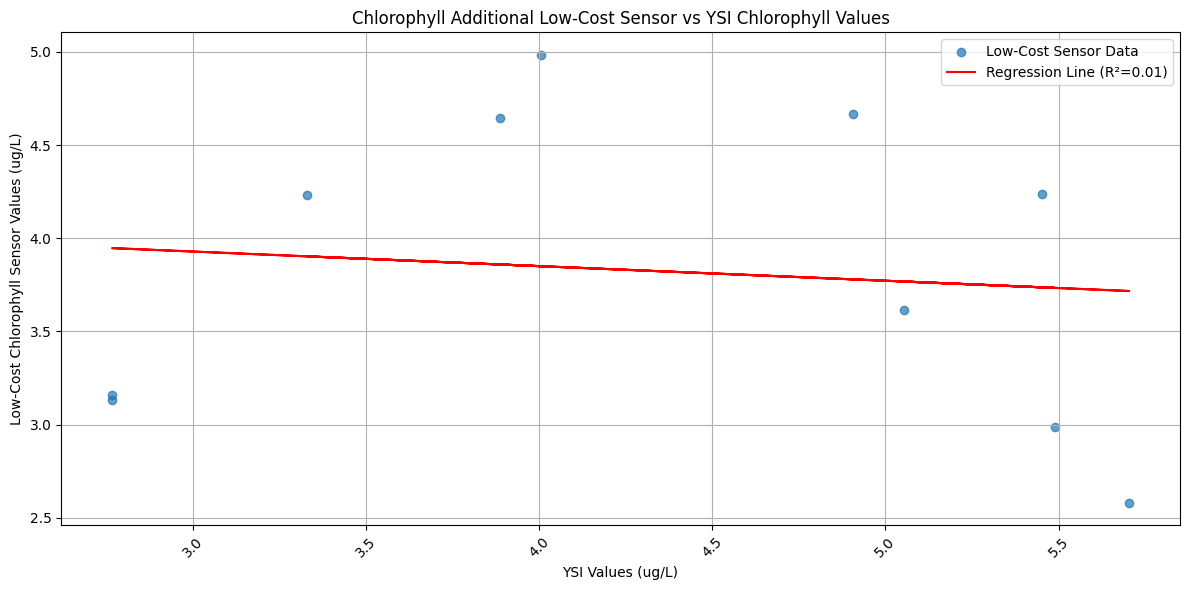

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# YSI Chlorophyll Values
YSI_chl_values = {
    'Trial': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'ug/L': [3.88796, 4.00704504950495, 3.33117892156862, 4.9066835643, 5.7038719, 5.05516920353982, 5.48843852941176, 2.76759633663366, 2.76759633663366, 5.45261599999999]
}

# Create a DataFrame for the YSI chl values
df_chl = pd.DataFrame(YSI_chl_values)
df_chl['Trial'] = df_chl['Trial'].astype(float)  # Convert 'Trial' column to float

# Read the second Excel file
df_excel2 = pd.read_excel('/Users/jessiewynne/5_13_alan.xlsx')

# Filter out non-numeric 'Trial' labels from df_excel2
df_excel2 = df_excel2[pd.to_numeric(df_excel2['Trial'], errors='coerce').notnull()]

# Convert 'Trial' to float
df_excel2['Trial'] = df_excel2['Trial'].astype(float)

# Group by 'Trial' and calculate the average 'Measurement Value' for each trial in the second Excel file
averages_excel2 = df_excel2.groupby('Trial')['Measurement Value'].mean()

# Solve for x using the equation y = 2.434x + 9.971 for the CSV file
x_values_excel2 = ((averages_excel2 - 9.871) / 2.434)

# Convert x_values_excel2 to a DataFrame and reset its index for proper merging
x_values_excel2_df = x_values_excel2.reset_index()

# Ensure the 'Trial' index in averages_excel2 is float
averages_excel2.index = averages_excel2.index.astype(float)

# Merge the CSV and YSI chl values
merged_df = pd.merge(df_chl, x_values_excel2_df, left_on='Trial', right_on='Trial', how='inner')

# Check if merged_df is empty before proceeding
if merged_df.empty:
    raise ValueError("Merged DataFrame is empty. Check if Trial values match between df_chl and averages_excel2.")

# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['ug/L'], merged_df['Measurement Value'], label='Low-Cost Sensor Data', alpha=0.7)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['ug/L'], merged_df['Measurement Value'])

# Calculate R-squared
r_squared = r_value ** 2

# Plot the regression line
plt.plot(merged_df['ug/L'], slope * merged_df['ug/L'] + intercept, color='red', label=f'Regression Line (R²={r_squared:.2f})')

plt.xlabel('YSI Values (ug/L)')
plt.ylabel('Low-Cost Chlorophyll Sensor Values (ug/L)')
plt.title('Chlorophyll Additional Low-Cost Sensor vs YSI Chlorophyll Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()